# Beyond Homeworld
## Chapter III: Cooking game

<p>After enjoying the four-room appartment and a deterministic investment game which cost our agent her life-saving (not really). She now works at a restaurant as a untrained cook. Firt step is to choose correct ingredients and how to do with it. In this setting, our Agent receives a task (a descriptive description of the dish) and must explore her way through trial and error to learn the correct way to prepare the meal.</p>

### The world
<p>The world is a tupple of $\mathcal{H,A,O,R}$. In a game, the Agent will be assign a state, which charaterised by the meal to be prepared. However, the state is partially observable to her, through a short description about the state, e.g., "I want rice which is prepared in frying pan and oil, side dish is boiled shrimp" refers to state h_i (<b>rice-fried-shrimp-boiled</b>). For our problem, main dishes are rice, bread, noodle with 3 ways of preparation: steam, fry, bake. Side dishes consist of shrimp, chicken, vegie with three ways to serve: boil, fry, steam. Mathematically speaking, this map to3 to power of 4, hence or <b>hidden state space $\mathcal{H}$. </b></p>

<p><b>Observed information $\mathcal{O}$:</b> as said is a codomain that related to our hidden state domain with a many-to-one relation. For each of state $h_i \in \mathcal{H}$, there will be multiple description about the meal to be served. Each statement in Observed space mapping to a unique states (Note: this is not a classification problem). The hidden state- observed description is prepare in a synthetic way (e.g.,  string <i>2gdzb##*</i> means <i>"I want fried rice with fry veggie"</i> for no particular reason.)</p>

<p><b>Action space A:</b> after observe o_i, agent will choose ingredidents and what to do with them. This mean the action space is "equal" to the state space. (??)</p>

<p><b>Rewards:</b> reward is received at the end of the game only (no immediate reward) which make sense in this one-step only game. If our agent correctly prepare the meal, she will receive a reward of $+100$. For every meal that is half correct, main dish or side dish, the reward is $0$ while getting all incorrect is a negative reward of $-100$.</p>

In [ ]:
### setting up environment
import pandas as pd
import numpy as np
import random
import string
from tqdm import tqdm
### maybe just that?


### The Algorithm

<p>In this simple set up. we consider the Q-iteration approach. The Bellman Optimality and the Optimal Policy take the form of:</p>

####  Bellman Optimality Equation for $Q^*(s,a)$:
$$Q^*(s,a) = \text{R}(s,a)$$

#### Optimal Policy $\pi^*(s)$:
$$\pi^*(s) = \underset{a \in A}{\text{argmax}} \, Q^*(s,a)$$

<p>Behind all the Pie and the Qute, the underlying of this problem is extreme simple: our Agent through trial and error learn about the state (task) she is in and act accordingly. For example, seeing a dot on the screen and touch that dot. We will extend the problem complexity if our Agent pass her probabtion time.</p>

### Implementation
#### Initiating world
<p>As briefly introduced, the state space is with size of $3^4$. State is characterized by a tuble of tubles:</p>
    $\text{(Main  dish, Side  dish)}$, where Main dish is $\text{(Main  Ingredient, Main Method)}$, where $\text{Main Ingredient} \in \text{(Rice, Bread, Noodle)}$, $\text{Main Method} \in \text{(Steam, Fry, Bake)}$
<br></br>
<p>Similarly:</p>
$\text{Side dish}$ is $\text{(Side Ingredient, Side Method)}$ with $\text{Side Ingredient} \in \text{(Shrimp, Chicken, Vegie)}$, $\text{Side Method} \in \text{(Boil, Fry, Steam)}$</p>


<p>Given the world of tuble of 9 for first dish and 9 for side dish, states $h_i$ are unorderred numbers from 0 to 81. Each will mapped to three autogenerated strings in Observed space O:</p>

In [ ]:
# main dish

main_ingredients = ["Rice", "Bread","Noodle"]
main_methods = ["Steam","boil","fry"]

action_1 = [(ingre, method) for ingre in main_ingredients for method in main_methods]

side_ingredients = ["Shrimp", "Chicken","Gemüse"]
side_methods = ["Boil", "Deepfry","steam"]

action_2 = [(ingre, method) for ingre in side_ingredients for method in side_methods]

In [ ]:
action_all = [(act1, act2) for act1 in action_1 for act2 in action_2]
states = action_all #same as action space
O_states = dict() #a dictionary with key is states themself and values is description of the states in strings

In [ ]:
# actually working with number is much easier than with text (we can use them to index our tables:
actions_number = [i for i in range(len(action_all))]
states_number  = [i for i in range(len(states))]

NUM_ACTIONS = len(actions_number)
NUM_STATES = len(states_number)


<p>Next, for each action_all we create a dictionary where keys are tuble elements of <b><i>action_all</i></b> and value are list of description. To save time, we auto generate indices and assign 3 for each state $h_i$ in $\mathcal{H}$. The diction in this case is <i>O_states</i></p>

In [ ]:
# take out the charcters and digits
letters = string.ascii_letters + string.digits

# looping over states, assign new object in the dictionary with key as state and values are three randomized strings
for state_i in states_number:
   O_states[state_i] =  [i for i in range(state_i*2, state_i*2+3)]

<p>Last but not least, Reward space $\mathcal{R}$ is a tupple of (-100, 0, 100) for getting no, at most one, and both actions correct.</p>

In [ ]:
# reward
Reward = ( 0, 100)

#### Structure of an Episode:

<p>An episode of our game is rather short: at the begining, a customer arrives having in mind a particular meal in mind with the probability of $1/N$, hence setting the state of the world. Agent does not know customer's thought and only received a description drawn from $\mathcal{O}$. Our agent based on experiences from playing all the games, make inference about the state (which order) she is in and choose appropriate choice to maximize rewards.</p>

In [ ]:
def initiate_state():
    state = random.choice(states_number)
    message = state # random.choice(O_states[state])
    return state, message


# Function to "undict" a dictionary, flatten its structure, and count elements
def flatten_and_count_elements(input_dict):
    # Initialize an empty list to store the flattened elements
    flattened_elements = []

    # Function to recursively extract elements from nested structures
    def extract_elements(element):
        if isinstance(element, dict):
            for value in element.values():
                extract_elements(value)
        elif isinstance(element, list):
            for item in element:
                extract_elements(item)
        else:
            flattened_elements.append(element)

    # Start the extraction process
    extract_elements(input_dict)

    # Return the count of flattened elements
    return len(flattened_elements)

# Count the total elements in the example dictionary
NUM_OBSERVEDS = flatten_and_count_elements(O_states)
NUM_OBSERVEDS

243

Setting parameters for our games:

In [ ]:
GAMMA = 1 # discounted factor, no discount anyway
TRAINING_EP = 0.08 # epsilon-greedy parameter for training
TESTING_EP = 0.005  # epsilon-greedy parameter for testing
NUM_RUNS = 150
NUM_EPOCHS = 5000
NUM_EPIS_TRAIN = 128  # number of games for training at each epoch
NUM_EPIS_TEST = 128  # number of games for testing
ALPHA = 1 # learning rate for training, 1 to replace old value with new value entirely

#### $\epsilon$-Greedy: Exploration vs (Good) Exploitation

<justified><p> For this exercise, we employ the epsilon to balancing the exploration by randomly taking an action vs. applying what have been learnt.
</p></justified>

In [ ]:
def epsilon_greedy(state, observed, q_func, epsilon):
    """Returns an action selected by an epsilon-Greedy exploration policy

    Args:
        state_1 (int): indices describing the current state
        state_2 (int): indicate observed signal: negative: stay/become bad, positive stay/becomd good
        q_func (np.ndarray): current Q-function
        epsilon (float): the probability of choosing a random command

    Returns:
        (int, int): the indices describing the action/object to take
    """
    coin = np.random.random_sample()
    if coin < epsilon:
        action_index = np.random.randint(NUM_ACTIONS)
    else:
        q_values = q_func[state, observed, :]
        action_index = np.unravel_index(np.argmax(q_values, axis=None),
                                          q_values.shape)[0]

    return (action_index)

def count_matches(state, action):
    return 1 if (state == action) else 0


In [ ]:
#### Update Q

In [ ]:
def tabular_q_learning(q_func, current_state, observed_current_state, action_index,
                       reward):
    """Update q_func for a given transition

    Args:
        q_func (np.ndarray): current Q-function
        current_state, observed_current_state (int, int): two indices describing the current state and the revelation of t+1
        action_index (int): index of the current action

        reward (float): the immediate reward the agent recieves from playing current command (atm = 0)
        next_state, observed_next_state (int, int): two indices describing the next state and revelation of t+2
        terminal (bool): True if this epsiode is over

    Returns:
        None
    """
    maxq_next_state = 0 # one time step game

    q_value = q_func[current_state, observed_current_state, action_index]
    q_func[current_state, observed_current_state, action_index] = (
        1 - ALPHA) * q_value + ALPHA * (reward + GAMMA * maxq_next_state)

In [ ]:
def run_episode(for_training):
    """ Runs one episode
    If for training, update Q function
    If for testing, choose action and print out reward

    Args:
        for_training (bool): True if for training

    Returns:

    """
    epsilon = TRAINING_EP if for_training else TESTING_EP
    gamma_step = 1
    epi_reward = 1

    (current_state, current_observed) = initiate_state()

    # Choose next action and execute
    action_index = epsilon_greedy(current_state, current_observed,
                                    q_func, epsilon)
    matches = count_matches(current_state, action_index)
    # Execute action and observe next state and reward
    if matches == 1:
        reward = 100
    elif matches == 0:
        reward = 0



    if for_training:
        # update Q-function.
        tabular_q_learning(q_func, current_state, current_observed,
                            action_index,reward)

    if not for_training:
        # update reward
        epi_reward = reward
        gamma_step = gamma_step * GAMMA

    if not for_training:
        return epi_reward

In [ ]:
def run_epoch():
    """Runs one epoch and returns reward averaged over test episodes"""
    rewards = []

    for _ in range(NUM_EPIS_TRAIN):
        run_episode(for_training=True)

    for _ in range(NUM_EPIS_TEST):
        global STEP_COUNT
        STEP_COUNT = 0
        rewards.append(run_episode(for_training=False))

    return np.mean(np.array(rewards))



def run():
    """Returns array of test reward per epoch for one run"""
    global q_func
    q_func = np.zeros((NUM_STATES, NUM_OBSERVEDS, NUM_ACTIONS))

    single_run_epoch_rewards_test = []
    pbar = tqdm(range(NUM_EPOCHS), ncols=80)
    for _ in pbar:
        single_run_epoch_rewards_test.append(run_epoch())
        pbar.set_description(
            "Avg reward: {:0.6f}".format(
                np.mean(single_run_epoch_rewards_test)))
    return single_run_epoch_rewards_test


Avg reward: 87.343906: 100%|███████████████| 5000/5000 [00:38<00:00, 128.43it/s]


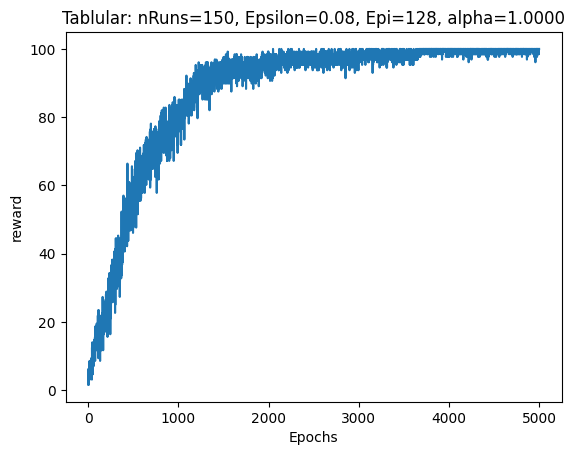

In [ ]:
import matplotlib.pyplot as plt

for _ in range(NUM_RUNS):
    epoch_rewards_test = []
    STEP_COUNT = 0
    epoch_rewards_test.append(run())

epoch_rewards_test = np.array(epoch_rewards_test)

x = np.arange(NUM_EPOCHS)
fig, axis = plt.subplots()
axis.plot(x, np.mean(epoch_rewards_test,
                      axis=0))  # plot reward per epoch averaged per run
axis.set_xlabel('Epochs')
axis.set_ylabel('reward')
axis.set_title(('Tablular: nRuns=%d, Epsilon=%.2f, Epi=%d, alpha=%.4f' %
                (NUM_RUNS, TRAINING_EP, NUM_EPIS_TRAIN, ALPHA)))
plt.show()

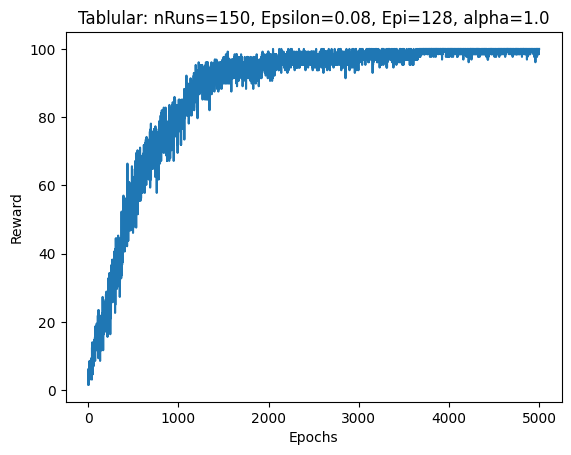

In [ ]:
x = np.arange(NUM_EPOCHS)
fig, axis = plt.subplots()
axis.plot(x, np.mean(epoch_rewards_test,
                      axis=0))  # plot reward per epoch averaged per run
axis.set_xlabel('Epochs')
axis.set_ylabel('Reward')
axis.set_title(('Tablular: nRuns=%d, Epsilon=%.2f, Epi=%d, alpha=%.1f' %
                (NUM_RUNS, TRAINING_EP, NUM_EPIS_TRAIN, ALPHA)))
plt.show()

In [ ]:
36*72*36

93312